In [1]:
from Net import Net
from layer import Connected, Convolution, Pooling
import GenerateDataAndPlot as gp
import numpy as np
import pandas as pd

In [2]:
# 读取鸢尾花数据
data = pd.read_csv('./data/iris.csv')
print(len(data))
print(data.head())

150
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
# 去掉 ID列
data = data.drop('Id', axis=1)

# 将种类转化为数字
data['Species'] = data['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

# 分割数据集, train:test = 8:2
train_data = data.sample(frac=0.8, random_state=200)
test_data = data.drop(train_data.index)
# print(train_data.head())
# print(test_data.head())
train_x = train_data.drop('Species', axis=1).values
train_y = train_data['Species'].values
test_x = test_data.drop('Species', axis=1).values
test_y = test_data['Species'].values

In [4]:
# 初始化网络
net = Net()
net.add(Connected(shape=(4, 5), activate='ReLU'))
net.add(Connected(shape=(5, 3), activate='Softmax'))

In [5]:
net.set(learning_rate=0.5, loss_function='MSE', epoch=10, batch_size=5, optimizer='SGD')

In [6]:
net.train(train_x, train_y)

[2024-02-21 20:05:44,156][Net.py][line:137][INFO] model path: C:/Users/szfmsmdx/Desktop/毕业论文/MyNet_based_LSH/NetWork/Model/2024-02-21_20：05：44 created!
[2024-02-21 20:05:44,156][Net.py][line:140][INFO] start training!
epoch_0: 100%|██████████| 24/24 [00:00<00:00, 1693.47it/s]
[2024-02-21 20:05:44,176][Net.py][line:153][INFO] epoch 0 finished!
epoch_1: 100%|██████████| 24/24 [00:00<00:00, 2572.01it/s]
[2024-02-21 20:05:44,189][Net.py][line:153][INFO] epoch 1 finished!
epoch_2: 100%|██████████| 24/24 [00:00<00:00, 2152.07it/s]
[2024-02-21 20:05:44,203][Net.py][line:153][INFO] epoch 2 finished!
epoch_3: 100%|██████████| 24/24 [00:00<00:00, 2115.49it/s]
[2024-02-21 20:05:44,215][Net.py][line:153][INFO] epoch 3 finished!
epoch_4: 100%|██████████| 24/24 [00:00<00:00, 1889.89it/s]
[2024-02-21 20:05:44,231][Net.py][line:153][INFO] epoch 4 finished!
epoch_5: 100%|██████████| 24/24 [00:00<00:00, 2063.75it/s]
[2024-02-21 20:05:44,244][Net.py][line:153][INFO] epoch 5 finished!
epoch_6: 100%|██████

In [7]:
net.eval(test_x, test_y, isAccuracy=True)

[2024-02-21 20:05:44,311][Net.py][line:113][INFO] start evaluating!
100%|██████████| 30/30 [00:00<00:00, 4583.44it/s]
[2024-02-21 20:05:44,324][Net.py][line:131][INFO] max accuracy: 0.0
[2024-02-21 20:05:44,324][Net.py][line:132][INFO] evaluating loss saved!
[2024-02-21 20:05:44,324][Net.py][line:133][INFO] evaluating finished!


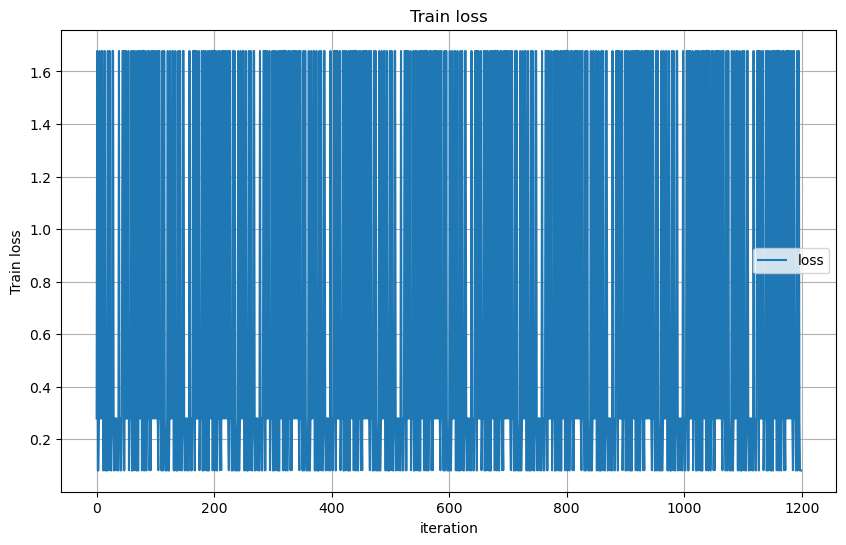

In [8]:
gp.plot_csv(net.model_path + '/train_loss.csv', ylabel='Train loss', title='Train loss')